In [1]:
!pip install --upgrade pandas-datareader

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

start = "2010-01-01"
end = "2019-12-31"
symbol = "AAPL"

df = yf.download(symbol, start=start, end=end)
print(df.head())




[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.478996  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.490201  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.386965  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.375157  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.417542  447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170479,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236237,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609901,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583107,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.002045,144114400


In [4]:
df =df.reset_index ()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478996,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [5]:
df =df.drop(["Date", "Adj Close"], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


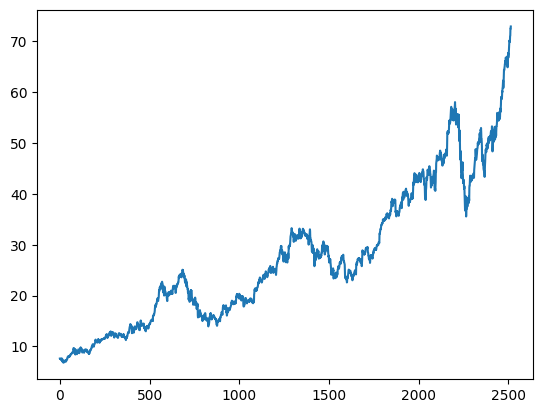

In [6]:
plt.plot(df["Close"])

In [7]:
df


,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [8]:
ma100 =df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

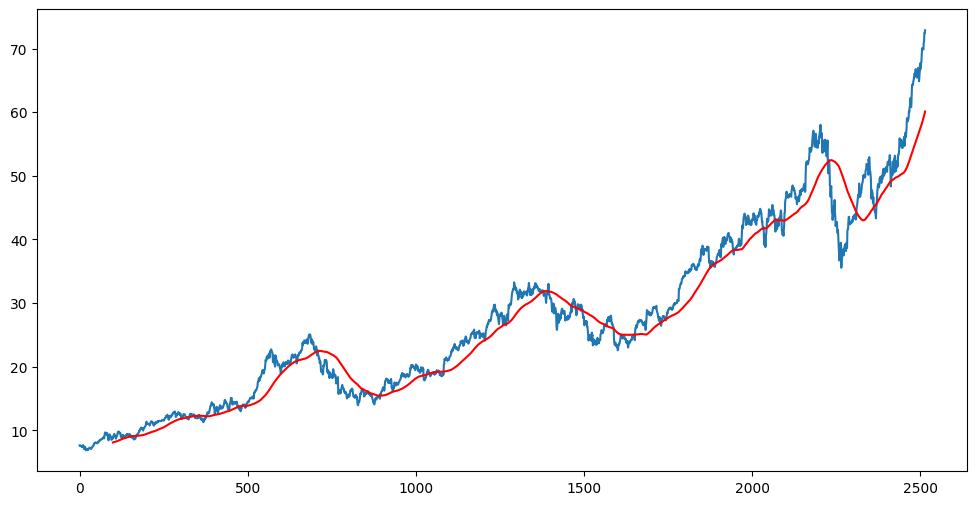

In [9]:
plt.figure(figsize =(12,6))
plt.plot (df.Close)
plt.plot (ma100,'r' )

In [10]:
ma200 =df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

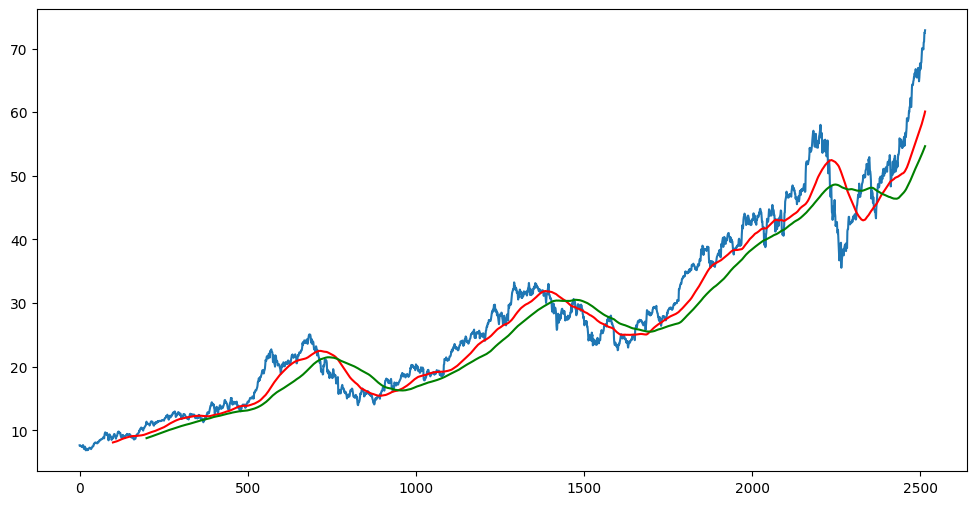

In [11]:
plt.figure(figsize =(12,6))
plt.plot (df.Close)
plt.plot (ma100,'r' )
plt.plot (ma200,'g' )

In [12]:
df.shape

(2515, 5)

In [13]:
#Sptitting Dota tnto Training and Testing
data_training =pd.DataFrame(df[ "Close" ][0: int (len(df)*0.70)])
data_testing =pd.DataFrame (df[ "Close" ][int (len(df)*0.70): int (len(df))])
print (data_training.shape)
print (data_testing.shape)

(1760, 1)
(755, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range =(0, 1))
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [17]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]) :
         x_train.append ( data_training_array[i-100: i])
         y_train.append (data_training_array[i, 0])
x_train, y_train =np.array (x_train), np.array(y_train)

In [18]:
#ML_MODEL

In [19]:
from keras.layers import Dense, Dropout ,LSTM
from keras. models import Sequential
model = Sequential()
model.add(LSTM(units =50, activation="relu", return_sequences =True,
      input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60, activation="relu", return_sequences =True ))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation="relu", return_sequences =True ))
model.add(Dropout(0.4))

model.add(LSTM(units =60, activation="relu" ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 60)                3

In [21]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit (x=x_train, y=y_train, epochs = 50) 


Epoch 1/50

52/52 [==============================] - 10s 113ms/step - loss: 0.0714
Epoch 2/50
52/52 [==============================] - 6s 109ms/step - loss: 0.0196
Epoch 3/50
52/52 [==============================] - 5s 102ms/step - loss: 0.0162
Epoch 4/50
52/52 [==============================] - 5s 99ms/step - loss: 0.0139
Epoch 5/50
52/52 [==============================] - 5s 92ms/step - loss: 0.0149
Epoch 6/50
52/52 [==============================] - 5s 98ms/step - loss: 0.0129
Epoch 7/50
52/52 [==============================] - 5s 94ms/step - loss: 0.0132
Epoch 8/50
52/52 [==============================] - 5s 100ms/step - loss: 0.0121
Epoch 9/50
52/52 [==============================] - 5s 96ms/step - loss: 0.0109
Epoch 10/50
52/52 [==============================] - 6s 107ms/step - loss: 0.0109
Epoch 11/50
52/52 [==============================] - 6s 117ms/step - loss: 0.0108
Epoch 12/50
52/52 [==============================] - 6s 116ms/step - loss: 0.0115
Epoch 13/50
52/52 [========

In [22]:
model.save('keras_model.h5')

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
x_train =x_train.reshape(1660,100)

x_train.shape

(1660, 100)

In [24]:
y_train =y_train.reshape(1660,1)

y_train.shape

(1660, 1)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [26]:
import pickle
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")
pickle.dump(model, open('model.pkl','wb'))

coefficient of determination: 0.9975627308666658


In [27]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [28]:
data_testing.tail(100)

,Close
2415,50.857498
2416,50.247501
2417,50.119999
2418,52.242500
2419,50.687500
...,...
2510,71.000000
2511,71.067497
2512,72.477501
2513,72.449997


In [29]:
past_100_days =data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [30]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [31]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [32]:
input_data.shape

(855, 1)

In [33]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [34]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [35]:
x_test =x_test.reshape(x_test.shape[0],100)
y_test =y_test.reshape(y_test.shape[0],1)

In [36]:
#Making Predictions
y_ =model.score(x_test,y_test)
y_

0.99260627973872

In [37]:
y_test

array([[0.0721907 ],
       [0.06736028],
       [0.06911197],
       [0.06842189],
       [0.07155371],
       [0.07845431],
       [0.08418707],
       [0.08482406],
       [0.08822126],
       [0.08556719],
       [0.08445249],
       [0.0895483 ],
       [0.0894952 ],
       [0.0883805 ],
       [0.0895483 ],
       [0.08997296],
       [0.08938906],
       [0.09952758],
       [0.0998461 ],
       [0.09989915],
       [0.09820055],
       [0.09671427],
       [0.1359945 ],
       [0.1348267 ],
       [0.1377462 ],
       [0.144169  ],
       [0.15075112],
       [0.15345824],
       [0.15547536],
       [0.1538829 ],
       [0.16009341],
       [0.16927655],
       [0.17187748],
       [0.17102824],
       [0.17299223],
       [0.17819418],
       [0.18037053],
       [0.1772918 ],
       [0.17798189],
       [0.17941503],
       [0.17973358],
       [0.1945963 ],
       [0.19019062],
       [0.19454325],
       [0.19220766],
       [0.19316316],
       [0.19040291],
       [0.188

In [38]:
y_

0.99260627973872

In [39]:
y_predicted=model.predict(x_test)

In [40]:
scaler.scale_[0]

0.021232550427044028

In [41]:
scale_factor= 1/(scaler.scale_[0])
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

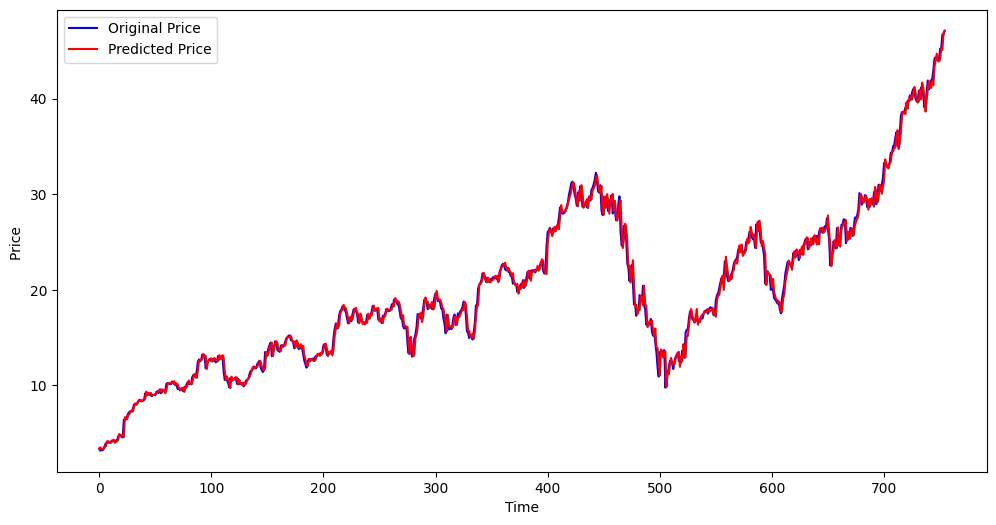

In [42]:
plt.figure(figsize= (12,6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel( "Price ")
plt.legend ()
plt.show()